https://www.kaggle.com/amiruladlil/cats-vs-dogs-classifier-using-neural-network

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

from zipfile import ZipFile
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop

In [3]:
train_dir = "./train/"
test_dir = "./test1/"

In [4]:
train_names = os.listdir(train_dir)
categories = []
for filename in train_names:
    category = filename.split(".")[0]
    if category == "dog":
        categories.append("dog")
    else:
        categories.append("cat")
df = pd.DataFrame({
    "filename" : train_names,
    "category" : categories
})

In [5]:
df

,filename,category
0,dog.8589.jpg,dog
1,dog.2624.jpg,dog
2,cat.5168.jpg,cat
3,dog.10462.jpg,dog
4,dog.690.jpg,dog
...,...,...
24995,cat.12451.jpg,cat
24996,cat.4370.jpg,cat
24997,cat.5525.jpg,cat
24998,dog.5555.jpg,dog


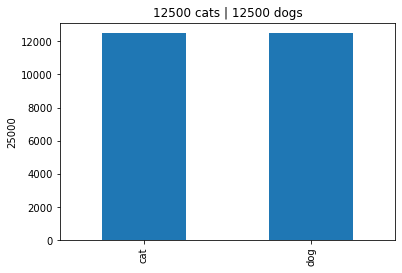

In [6]:
df.category.value_counts().plot.bar()
plt.title(str(len(df[df['category'] == 'cat']))+" cats" + " | " +str(len(df[df['category'] == 'dog']))+" dogs")
plt.ylabel(len(df))
plt.show()

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(120, 120, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

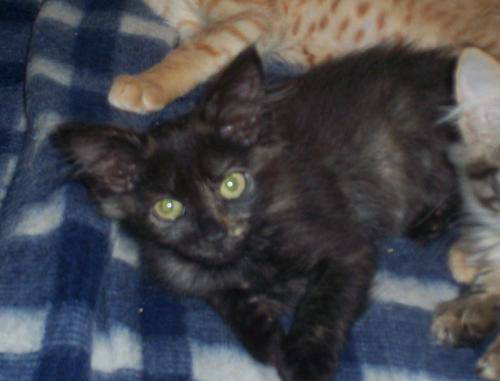

In [8]:
load_img(train_dir+random.choice(df.filename))

In [15]:
train_df, validate_df = train_test_split(df, test_size = 0.2, random_state = 42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [16]:
train_datagen = ImageDataGenerator(rotation_range=40,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "./train/", 
    x_col='filename',
    y_col='category',
    target_size=(120,120),
    class_mode='binary',
    batch_size=64,
    color_mode="rgb",
    shuffle=True
)

Found 20000 validated image filenames belonging to 2 classes.


In [17]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./train/", 
    x_col='filename',
    y_col='category',
    target_size=(120,120),
    class_mode='binary',
    batch_size=64,
    color_mode="rgb",
    shuffle=True
)

Found 5000 validated image filenames belonging to 2 classes.


In [18]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

/home/jent_so/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
312/312 [==============================] - 299s 921ms/step - loss: 1.2826 - accuracy: 0.5267 - val_loss: 0.6788 - val_accuracy: 0.5300
Epoch 2/100
312/312 [==============================] - 174s 551ms/step - loss: 0.6776 - accuracy: 0.6003 - val_loss: 0.6057 - val_accuracy: 0.6818
Epoch 3/100
312/312 [==============================] - 128s 408ms/step - loss: 0.6399 - accuracy: 0.6449 - val_loss: 0.5807 - val_accuracy: 0.7072
Epoch 4/100
312/312 [==============================] - 128s 407ms/step - loss: 0.6162 - accuracy: 0.6676 - val_loss: 0.4931 - val_accuracy: 0.7628
Epoch 5/100
312/312 [==============================] - 128s 409ms/step - loss: 0.5838 - accuracy: 0.6998 - val_loss: 0.5009 - val_accuracy: 0.7714
Epoch 6/100
312/312 [==============================] - 128s 408ms/step - loss: 0.5672 - accuracy: 0.7107 - val_loss: 0.5157 - val_accuracy: 0.7570
Epoch 7/100
312/312 [==============================] - 129s 410ms/step - loss: 0.5522 - accuracy: 0.7220 - val_loss: 0

Text(0.5, 1.0, 'Training and validation loss')

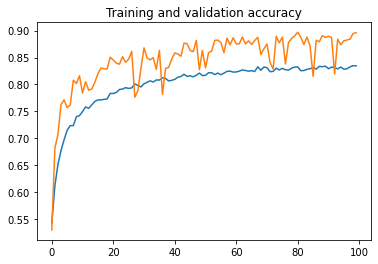

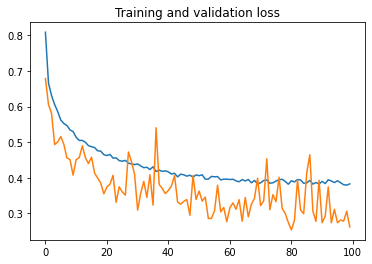

In [19]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_df)/64,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=len(validate_df)/64
)

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [20]:
model.save('scond_try_model.h5')

In [12]:
from keras.models import load_model 
model = load_model('scond_try_model.h5')

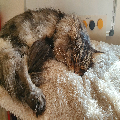

In [33]:
from keras.preprocessing import image

athos = image.load_img('Athos.jpg',False,target_size=(120,120))
athos

In [34]:
athos = image.img_to_array(athos)

athos = np.expand_dims(athos, axis=0)

model.predict(athos)

array([[1.]], dtype=float32)

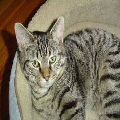

In [31]:
img = load_img(train_dir+random.choice(df.filename), target_size=(120,120))
img

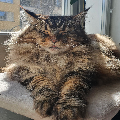

array([[0.]], dtype=float32)

In [62]:
img = load_img('d5.jpg', target_size=(120,120))
display(img)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
model.predict(img)

In [55]:
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
model.predict(img)

array([[0.]], dtype=float32)